# FRC Match Metrics
Displays the results of a FRC match in a series of charts

## Setup
In your virtual environment, install pandas and matplotlib: 
  `pip install pandas matplotlib`
* If you are using VS Code, it should ask you to install the IPython extensions.
* If this next cell runs with no errors, you are all set.

In [1]:
import util
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

## Functions to get Team and Event names
Some parts of this notebook depend on a team you are interested in.  Other parts of this notebook need to look up the team name.  This section defines a function to look up the team name.  Same things for event name.

In [2]:
def get_team_name(team_id):
    url = f'https://www.thebluealliance.com/api/v3/team/{team_id}'
    return util.call_tba_api(url).json()['nickname']

def get_event_name(event_id):
    url = f'https://www.thebluealliance.com/api/v3/event/{EVENT_KEY}/simple'
    resp = util.call_tba_api(url).json()
    return str(resp['year']) + ' ' + resp['name']

## Default Team and Event

In [3]:
TEAM = 'frc6223'
EVENT_KEY = '2024wila'

TEAM_NAME = get_team_name(TEAM)
EVENT_NAME = get_event_name(EVENT_KEY)

print(TEAM_NAME, 'at', EVENT_NAME)

Arsenal of Engineering at 2024 Seven Rivers Regional


## Team Metrics at one Event
There are three special metrics from TBA at `/oprs`.  The other basic metrics are at `\rankings`.

In this section, we create a Pandas dataframe.  Think about it like a spreadsheet in memory.  There are a couple of techniques used here to best get the data out of the different JSON responses.
1. The OPR metrics are in a dictionary by team, so we can pull them into individual dataframes.
2. The other metrics are in an array by each team, so we have to:

    * Figure out what values they provide.
    * Create a dataframe with those headers
    * Loop through the teams and put the unlabeled values into an array. (I add a calculated one: ranking points)
    * Append that array to the dataframe
3. Then we merge the three dfs from 1 into 2.
4. We add the team name.  This is a pretty powerful syntax.  For each row, it calls a function using the team value and inserts the name value.

In [4]:
# Get calculated rankings
url = f'https://www.thebluealliance.com/api/v3/event/{EVENT_KEY}/oprs'
response = util.call_tba_api(url).json()

df_opr = pd.DataFrame.from_dict(response['oprs'], orient='index', columns=['opr'])
df_dpr = pd.DataFrame.from_dict(response['dprs'], orient='index', columns=['dpr'])
df_ccwm = pd.DataFrame.from_dict(response['ccwms'], orient='index', columns=['ccwm'])

# Get other rankings
url = f'https://www.thebluealliance.com/api/v3/event/{EVENT_KEY}/rankings'
response = util.call_tba_api(url).json()

# Find out what values they have and create a base dataframe
headers = ['team']
for x in response['sort_order_info']:
    headers.append(x['name'])
headers.append('Ranking Points')
df = pd.DataFrame(columns=headers)

# Loop through the teams and add a record with the team's ranking
for r in response['rankings']:
    record = [r['team_key']]
    for x in range(len(headers) - 2):
        record.append(r['sort_orders'][x])
    record.append(r['sort_orders'][0] * r['matches_played'])
    df.loc[len(df.index)] = record

# Merge the original metrics into our most recent dataframe
df = df.merge(df_opr, left_on='team', right_index=True)
df = df.merge(df_dpr, left_on='team', right_index=True)
df = df.merge(df_ccwm, left_on='team', right_index=True)

# Get team names
df['Name'] = df['team'].apply(get_team_name)

# Clean up variables we don't need
del df_ccwm, df_dpr, df_opr, url, response, r, record, x, headers

df

,team,Ranking Score,Avg Coop,Avg Match,Avg Auto,Avg Stage,Ranking Points,opr,dpr,ccwm,Name
0,frc7021,3.4,0.5,78.7,30.9,9.4,34.0,42.221244,17.846614,24.374630,TC Robotics
1,frc1710,3.1,1.0,69.2,25.7,7.5,31.0,33.716997,12.834876,20.882121,The Ravonics Revolution
2,frc8802,2.9,0.4,74.7,27.7,3.4,29.0,32.721625,17.219435,15.502191,Milwaukee United
3,frc2194,2.8,0.4,69.4,25.9,5.3,28.0,38.822912,9.755964,29.066947,Fondy Fire
4,frc2704,2.7,0.7,61.8,21.5,6.7,27.0,30.036275,16.126180,13.910095,Roaring Robotics
5,frc2830,2.6,0.7,67.5,27.3,3.8,26.0,33.156991,22.831814,10.325177,Riverside RoboTigers
6,frc2129,2.6,0.4,75.2,26.3,5.1,26.0,39.280134,18.912678,20.367456,Ultraviolet
7,frc2826,2.5,0.7,59.2,20.5,5.4,25.0,28.061363,6.045372,22.015991,Wave Robotics
8,frc6166,2.5,0.6,60.6,25.7,5.7,25.0,17.344833,15.682399,1.662434,Thorobotics
9,frc5903,2.4,0.9,60.8,21.5,6.5,24.0,27.233713,11.939164,15.294549,ThorBots


## Function to Draw a Chart
This function draws a horizontal bar chart for the specified column.
Right now, it accesses "global" variables for `TEAM`, `TEAM_NAME` and `EVENT_NAME`.
You only need to run this cell once per session.

In [5]:
# Create a chart given a dataframe and other info
def print_chart(df, col, title, invert=False):
    # First, sort by the column we are interested in
    df = df.sort_values(by=col, ascending=invert, ignore_index=True) 

    # Get the figure and axis variables so we can configure it
    fig, ax = plt.subplots()

    # Create a horizontal bar chart with the data
    hbars = ax.barh(df['team'], df[col], align='center')

    # Highlight the team we are interested in
    i = df[df['team'] == TEAM].index.values[0]
    hbars[i].set_color('r')  

    # Turn off the labels - too noisy
    ax.get_yaxis().set_visible(False)

    # Make it descending - maybe pass this in...
    ax.invert_yaxis()

    # Get our score
    score = df[df['team'] == TEAM][col].values[0]

    team_loc = '#' + str(TEAM).replace('frc','') + ' ' + TEAM_NAME + ' at ' + EVENT_NAME + '\n'

    ax.set_title(team_loc  + title.replace('\n', f' = {score:.2f} (#{i + 1})\n'))
    plt.show()

    print(df[['team', col, 'Name']].iloc[:15])


## Print Charts

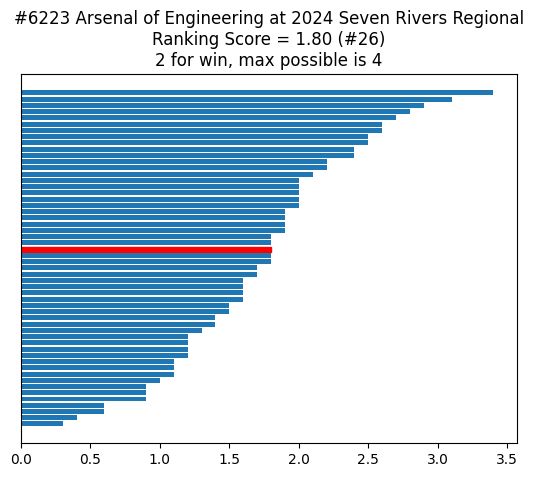

       team  Ranking Score                     Name
0   frc7021            3.4              TC Robotics
1   frc1710            3.1  The Ravonics Revolution
2   frc8802            2.9         Milwaukee United
3   frc2194            2.8               Fondy Fire
4   frc2704            2.7         Roaring Robotics
5   frc2830            2.6     Riverside RoboTigers
6   frc2129            2.6              Ultraviolet
7   frc2826            2.5            Wave Robotics
8   frc6166            2.5              Thorobotics
9   frc5903            2.4                 ThorBots
10  frc5914            2.4         Robotic Warriors
11  frc3082            2.2          Chicken Bot Pie
12  frc4230            2.2               TopperBots
13  frc2202            2.1           BEAST Robotics
14   frc525            2.0                Swartdogs


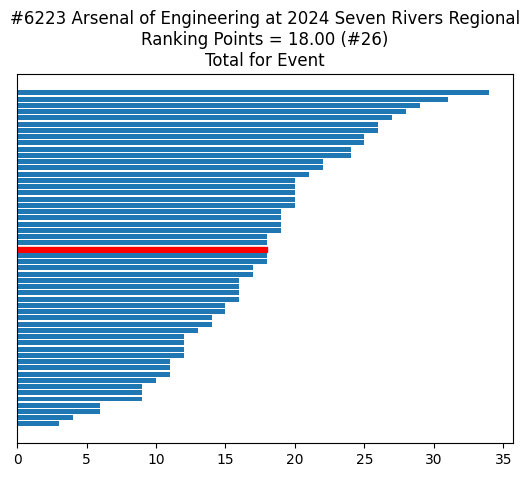

       team  Ranking Points                     Name
0   frc7021            34.0              TC Robotics
1   frc1710            31.0  The Ravonics Revolution
2   frc8802            29.0         Milwaukee United
3   frc2194            28.0               Fondy Fire
4   frc2704            27.0         Roaring Robotics
5   frc2830            26.0     Riverside RoboTigers
6   frc2129            26.0              Ultraviolet
7   frc2826            25.0            Wave Robotics
8   frc6166            25.0              Thorobotics
9   frc5903            24.0                 ThorBots
10  frc5914            24.0         Robotic Warriors
11  frc3082            22.0          Chicken Bot Pie
12  frc4230            22.0               TopperBots
13  frc2202            21.0           BEAST Robotics
14   frc525            20.0                Swartdogs


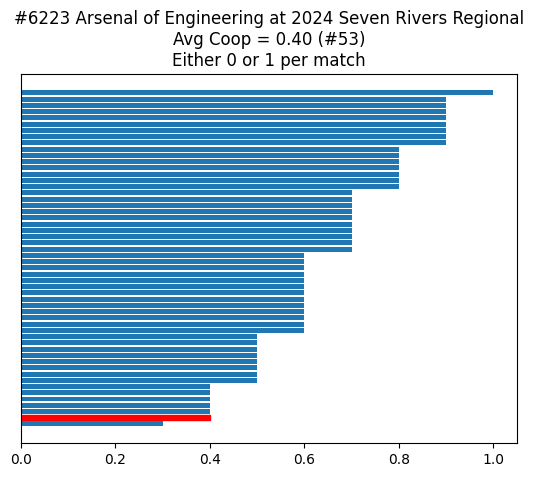

       team  Avg Coop                             Name
0   frc1710       1.0          The Ravonics Revolution
1   frc2202       0.9                   BEAST Robotics
2   frc7619       0.9                       illumiBOTi
3   frc3090       0.9                 Chaotic Robotics
4   frc8024       0.9                         Robotans
5   frc1675       0.9  UPS (Ultimate Protection Squad)
6    frc537       0.9                 Charger Robotics
7   frc5903       0.9                         ThorBots
8   frc1306       0.9                       BadgerBOTS
9   frc9578       0.8                       Player One
10  frc4011       0.8         πρbοtics   (Pi Robotics)
11  frc5826       0.8                    Avis Automata
12  frc5586       0.8                     Bond Brigade
13   frc525       0.8                        Swartdogs
14  frc2977       0.8                  Sir Lancer Bots


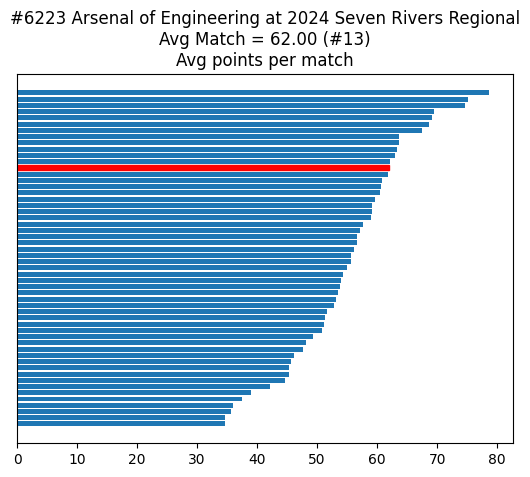

       team  Avg Match                     Name
0   frc7021       78.7              TC Robotics
1   frc2129       75.2              Ultraviolet
2   frc8802       74.7         Milwaukee United
3   frc2194       69.4               Fondy Fire
4   frc1710       69.2  The Ravonics Revolution
5   frc4230       68.6               TopperBots
6   frc2830       67.5     Riverside RoboTigers
7    frc525       63.7                Swartdogs
8   frc2202       63.7           BEAST Robotics
9   frc1625       63.3              Winnovation
10  frc3082       63.0          Chicken Bot Pie
11   frc967       62.1               Iron Lions
12  frc6223       62.0   Arsenal of Engineering
13  frc2704       61.8         Roaring Robotics
14  frc5903       60.8                 ThorBots


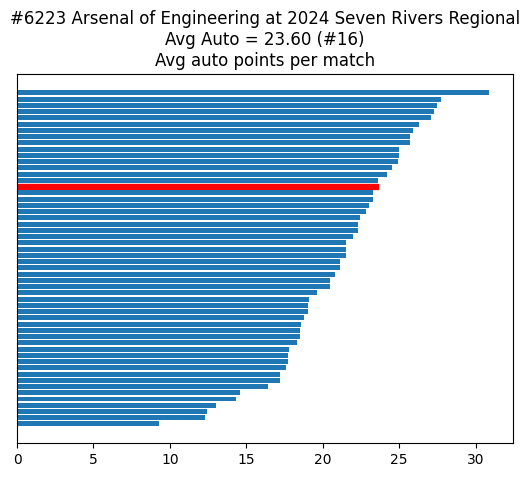

       team  Avg Auto                                          Name
0   frc7021      30.9                                   TC Robotics
1   frc8802      27.7                              Milwaukee United
2   frc2506      27.5                                Saber Robotics
3   frc2830      27.3                          Riverside RoboTigers
4    frc525      27.1                                     Swartdogs
5   frc2129      26.3                                   Ultraviolet
6   frc2194      25.9                                    Fondy Fire
7   frc6166      25.7                                   Thorobotics
8   frc1710      25.7                       The Ravonics Revolution
9   frc4230      25.0                                    TopperBots
10  frc1675      25.0               UPS (Ultimate Protection Squad)
11  frc7103      24.9  Robo Remedy @ Mantiowoc Lutheran High School
12  frc1625      24.5                                   Winnovation
13  frc3381      24.2                           

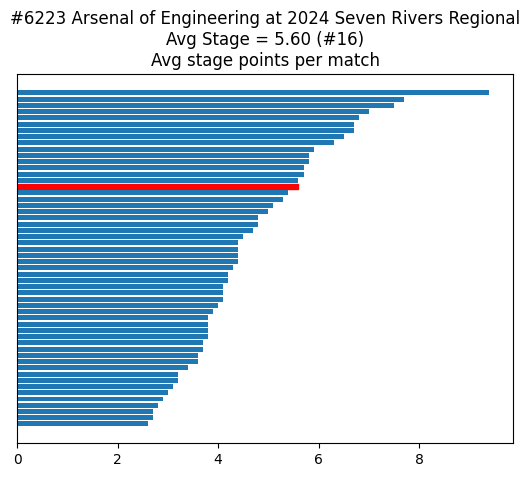

       team  Avg Stage                     Name
0   frc7021        9.4              TC Robotics
1   frc8024        7.7                 Robotans
2   frc1710        7.5  The Ravonics Revolution
3   frc3082        7.0          Chicken Bot Pie
4   frc1091        6.8           Oriole Assault
5   frc2704        6.7         Roaring Robotics
6   frc2506        6.7           Saber Robotics
7   frc5903        6.5                 ThorBots
8   frc4230        6.3               TopperBots
9   frc8531        5.9           TermiKnightors
10  frc9578        5.8               Player One
11  frc5148        5.8         New Berlin Blitz
12  frc6166        5.7              Thorobotics
13  frc1716        5.7         Redbird Robotics
14  frc9676        5.6           Hub City STEAM


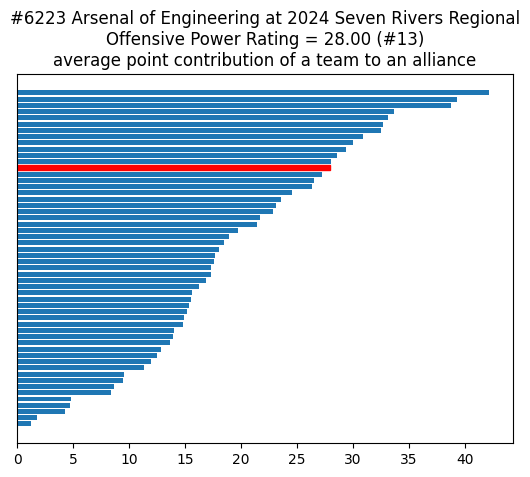

       team        opr                             Name
0   frc7021  42.221244                      TC Robotics
1   frc2129  39.280134                      Ultraviolet
2   frc2194  38.822912                       Fondy Fire
3   frc1710  33.716997          The Ravonics Revolution
4   frc2830  33.156991             Riverside RoboTigers
5   frc8802  32.721625                 Milwaukee United
6   frc4230  32.538252                       TopperBots
7    frc525  30.936757                        Swartdogs
8   frc2704  30.036275                 Roaring Robotics
9   frc1675  29.365745  UPS (Ultimate Protection Squad)
10  frc1625  28.604217                      Winnovation
11  frc2826  28.061363                    Wave Robotics
12  frc6223  27.995329           Arsenal of Engineering
13  frc5903  27.233713                         ThorBots
14  frc9576  26.561240                Loretto Lightning


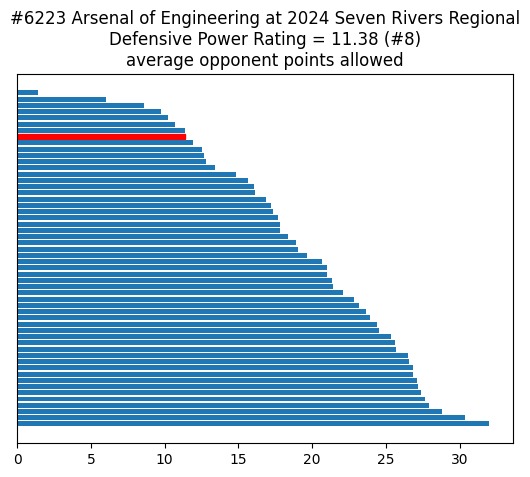

       team        dpr                     Name
0   frc5914   1.452190         Robotic Warriors
1   frc2826   6.045372            Wave Robotics
2   frc3381   8.622153               Droid Rage
3   frc2194   9.755964               Fondy Fire
4    frc537  10.215901         Charger Robotics
5   frc1259  10.719869           Paradigm Shift
6   frc3082  11.376962          Chicken Bot Pie
7   frc6223  11.377535   Arsenal of Engineering
8   frc5903  11.939164                 ThorBots
9   frc5826  12.566102            Avis Automata
10  frc2506  12.652747           Saber Robotics
11  frc1710  12.834876  The Ravonics Revolution
12  frc1306  13.403298               BadgerBOTS
13  frc6651  14.846752              Golden Bots
14  frc6166  15.682399              Thorobotics


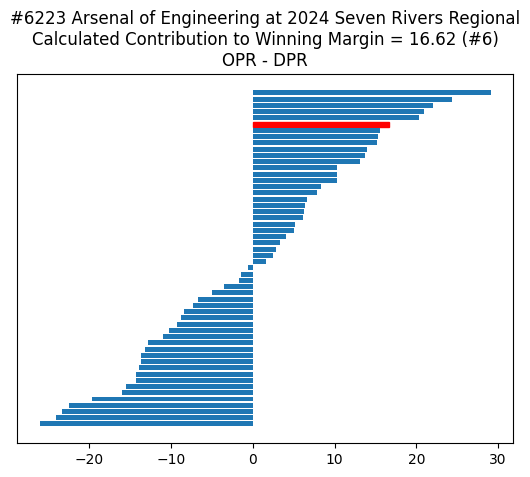

       team       ccwm                     Name
0   frc2194  29.066947               Fondy Fire
1   frc7021  24.374630              TC Robotics
2   frc2826  22.015991            Wave Robotics
3   frc1710  20.882121  The Ravonics Revolution
4   frc2129  20.367456              Ultraviolet
5   frc6223  16.617794   Arsenal of Engineering
6   frc8802  15.502191         Milwaukee United
7   frc5903  15.294549                 ThorBots
8   frc4230  15.221621               TopperBots
9   frc2704  13.910095         Roaring Robotics
10  frc5914  13.704348         Robotic Warriors
11  frc3082  13.170825          Chicken Bot Pie
12  frc2830  10.325177     Riverside RoboTigers
13  frc2506  10.256732           Saber Robotics
14  frc1625  10.248993              Winnovation


In [6]:
print_chart(df, 'Ranking Score', 'Ranking Score\n2 for win, max possible is 4')
print_chart(df, 'Ranking Points', 'Ranking Points\nTotal for Event')
print_chart(df, 'Avg Coop', 'Avg Coop\nEither 0 or 1 per match')
print_chart(df, 'Avg Match', 'Avg Match\nAvg points per match')
print_chart(df, 'Avg Auto', 'Avg Auto\nAvg auto points per match')
print_chart(df, 'Avg Stage', 'Avg Stage\nAvg stage points per match')

print_chart(df, 'opr', 'Offensive Power Rating\naverage point contribution of a team to an alliance')
print_chart(df, 'dpr', 'Defensive Power Rating\naverage opponent points allowed', True)
print_chart(df, 'ccwm', 'Calculated Contribution to Winning Margin\nOPR - DPR')

## Count Undefeated Teams

In [7]:
year = '2024'
url = f'https://www.thebluealliance.com/api/v3/events/{year}/simple'
events = util.call_tba_api(url).json()
event_count = 0
team_appearances = 0
undefeated = 0
for e in events:
    # Event type: 0 - regional, 1 - district...
    if datetime.strptime(e['end_date'], "%Y-%m-%d") < datetime.now() and e['event_type'] == 0:
        event_count += 1
        event_code = year + e['event_code']
        print(event_code, e['end_date'], e['name'])

        url = f'https://www.thebluealliance.com/api/v3/event/{event_code}/rankings'
        rankings = util.call_tba_api(url).json()
        teams = 0
        for r in rankings['rankings']:
            teams += 1
            if r['record']['wins'] > 0 and r['record']['losses'] == 0 and r['record']['ties'] == 0:
                team_key = r['team_key']
                url = f'https://www.thebluealliance.com/api/v3/team/{team_key}'
                t = util.call_tba_api(url).json()
                print('  ', team_key, r['rank'], t['nickname'], t['city'], t['state_prov'] )
                undefeated += 1
        team_appearances += teams
        print('  ', teams, 'teams')

# Clean up variables
del e, events, r, rankings, t, team_key, teams, url, year, event_code

print('Events:', event_count)
print('Team appearances:', team_appearances)
print('Undefeated:', undefeated, f'{undefeated/team_appearances:.1%}')


 

2024alhu 2024-04-06 Rocket City Regional
   frc4635 1 PrepaTec - Botbusters Monterrey Nuevo León
   47 teams
2024arli 2024-03-09 Arkansas Regional
   28 teams
2024ausc 2024-03-17 Southern Cross Regional
   frc8814 2 Blackhole Shanghai Shanghai
   47 teams
2024azgl 2024-03-23 Arizona East Regional
   41 teams
2024azva 2024-03-16 Arizona Valley Regional
   41 teams
2024bcvi 2024-03-02 Canadian Pacific Regional
   36 teams
2024brbr 2024-03-02 Brazil Regional
   frc1156 1 Under Control Novo Hamburgo Rio Grande do Sul
   frc9602 2 CANINTECH SINOP Mato Grosso
   frc9175 3 BrainMachine-FRC catalão Goiás
   55 teams
2024caav 2024-04-06 Aerospace Valley Regional
   40 teams
2024cabe 2024-04-07 East Bay Regional
   frc254 1 The Cheesy Poofs San Jose California
   60 teams
2024cada 2024-03-16 Sacramento Regional
   38 teams
2024cafr 2024-03-24 Central Valley Regional
   39 teams
2024cala 2024-03-17 Los Angeles Regional
   frc368 1 Team Kika Mana Honolulu Hawaii
   44 teams
2024camb 2024-03-30 Mon